<a href="https://colab.research.google.com/github/amurkhon/MachineLearning-projects/blob/main/DL_2P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import fastai
import torch
print(fastai.__version__)
print(torch.__version__)

2.6.3
1.11.0+cu113


In [3]:
torch.cuda.is_available()

True

In [ ]:
#!git clone https://github.com/EscVM/OIDv4_ToolKit
#!cd OIDv4_ToolKit/ && pip install -r requirements.txt

In [ ]:
#!cd OIDv4_ToolKit && python main.py -h

In [21]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Marine_mammal Carnivore Bear Insect Bird Mammal --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Marine mammal.

Marine mammal
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 974 online images for train.
    [INFO] | Limiting to 200 images.
    [INFO] | Download of 170 images

In [22]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path("train")

#Datablock
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
    )

#Dataloder yaratamiz
dls = animals.dataloaders(path)

#Datasetni tekshiarmiz
#dls.train.show_batch(max_n=32, nrows=4)

#O'qitish (trainning)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)


/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.494008,0.574399,0.827586,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.608126,0.512625,0.857143,00:36
1,0.440656,0.490712,0.876847,00:37
2,0.298986,0.512280,0.859606,00:36
3,0.213612,0.504817,0.854680,00:36


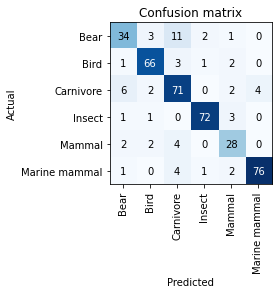

In [23]:
#Tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

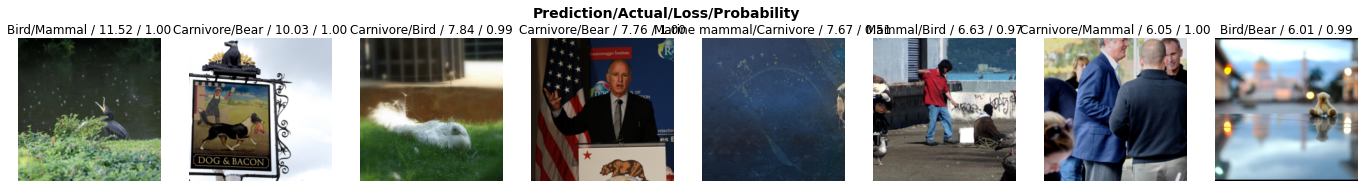

In [24]:
interp.plot_top_losses(8,nrows=1)

In [25]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: Mammal
Ehtimollik: 32.7%


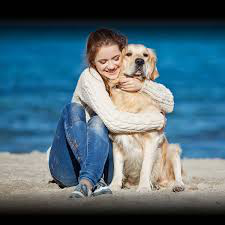

In [46]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Bashorat: {pred}")
print(f"Ehtimollik: {probs[pred_id]*100:.1f}%")
img

In [43]:
learn.export('animal_model.pkl')

In [41]:
model = load_learner("/content/transport_model.pkl")

In [42]:
model.predict(img)

('Carnivore',
 TensorBase(2),
 TensorBase([3.4586e-03, 3.9339e-05, 9.9645e-01, 2.5439e-05, 2.8167e-05, 3.4898e-06]))